<a href="https://colab.research.google.com/github/AshrakShohas/HeartMainProject/blob/main/HeartMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix           
from sklearn.ensemble import RandomForestClassifier    
import statsmodels.api as sn                           
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB             
from sklearn import model_selection                  
from sklearn.metrics import classification_report,roc_auc_score,roc_curve 
from sklearn.metrics import classification_report      
import pickle                                        
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant
np.random.seed(123) 
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/gdrive/MyDrive/Final year Project/Dataset/massachusetts.csv')

In [5]:
heart_data_2 = pd.read_csv('/content/gdrive/MyDrive/Final year Project/Dataset/heart_statlog_cleveland_hungary_final.csv')

In [6]:
# loading the csv data to a Pandas DataFrame
heart_data_3 = pd.read_csv('/content/gdrive/MyDrive/Final year Project/Dataset/Tobaco heart_failure_clinical_records_dataset.csv')

In [7]:
# loading the csv data to a Pandas DataFrame
heart_data_4 = pd.read_csv('/content/gdrive/MyDrive/Final year Project/Dataset/Simillarities main.csv')

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   object 
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   object 
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   object 
 13  heartRate        4240 non-null   object 
 14  glucose          4240 non-null   object 
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 530.1+ KB


In [9]:
heart_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [10]:
heart_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
heart_data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             5729 non-null   int64  
 1   age             5729 non-null   float64
 2   diabetes        5729 non-null   int64  
 3   smoking         4539 non-null   float64
 4   max heart rate  5729 non-null   object 
 5   cholesterol     5729 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 268.7+ KB


In [12]:
heart_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
heart_data.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.1,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2,1,20,,0,0,0,248,131.0,72.0,22,84,86,0
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,,0
4237,0,52,2,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0
4238,1,40,3,0,0,0,0,1,0,185,141.0,98.0,25.6,67,72,0


In [14]:
heart_data.dropna().isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
heart_data_2.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [16]:
heart_data_3.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [17]:
heart_data_4.isnull().sum()

sex                  0
age                  0
diabetes             0
smoking           1190
max heart rate       0
cholesterol          0
dtype: int64

In [18]:
heart_data_4.smoking.median()

0.0

In [19]:
heart_data_4["smoking"].fillna(heart_data_4.groupby("diabetes")["smoking"].transform("median"),inplace=True)



In [20]:
heart_data_4.groupby("diabetes")["smoking"].transform("median")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5724    0.0
5725    0.0
5726    0.0
5727    0.0
5728    0.0
Name: smoking, Length: 5729, dtype: float64

In [21]:
heart_data_4.isnull().sum()

sex               0
age               0
diabetes          0
smoking           0
max heart rate    0
cholesterol       0
dtype: int64

In [22]:
heart_data_4.dropna()

,sex,age,diabetes,smoking,max heart rate,cholesterol
0,1,75.0,0,0.0,0,0
1,1,55.0,0,0.0,0,0
2,1,65.0,0,1.0,0,0
3,1,50.0,0,0.0,0,0
4,0,65.0,1,0.0,0,0
...,...,...,...,...,...,...
5724,0,48.0,0,1.0,84,248
5725,0,44.0,0,1.0,86,210
5726,0,52.0,0,0.0,80,269
5727,1,40.0,0,0.0,67,185


In [23]:
heart_data_4.dropna().isnull().sum()

sex               0
age               0
diabetes          0
smoking           0
max heart rate    0
cholesterol       0
dtype: int64

In [24]:
# statistical measures about the data
heart_data.describe()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,0.005896,0.310613,0.025708,132.354599,82.897759,0.151887
std,0.495027,8.572942,0.500024,0.076569,0.462799,0.158280,22.033300,11.910394,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,117.000000,75.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,128.000000,82.000000,0.000000
75%,1.000000,56.000000,1.000000,0.000000,1.000000,0.000000,144.000000,90.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,295.000000,142.500000,1.000000


In [25]:
# statistical measures about the data
heart_data_2.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [26]:
# statistical measures about the data
heart_data_3.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [27]:
# statistical measures about the data
heart_data_4.describe()

,sex,age,diabetes,smoking
count,5729.000000,5729.000000,5729.000000,5729.000000
mean,0.510211,51.027463,0.085181,0.382440
std,0.499939,9.381172,0.279175,0.486026
min,0.000000,28.000000,0.000000,0.000000
25%,0.000000,43.000000,0.000000,0.000000
50%,1.000000,51.000000,0.000000,0.000000
75%,1.000000,58.000000,0.000000,1.000000
max,1.000000,95.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a04d5e990>,
      dtype=object)

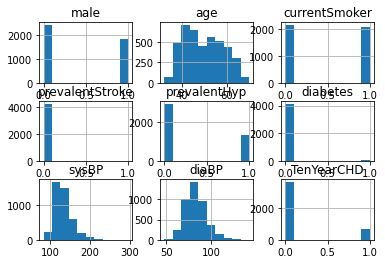

In [28]:
heart_data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a042deb90>,
      dtype=object)

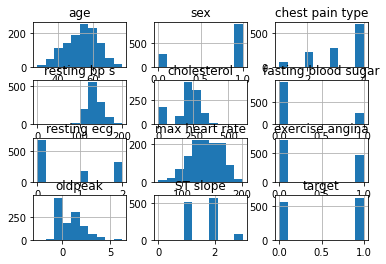

In [29]:
heart_data_2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a03bf7910>,
      dtype=object)

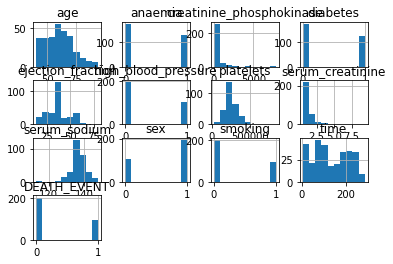

In [30]:
heart_data_3.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a040b9e10>,
      dtype=object)

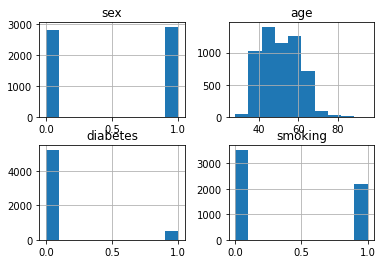

In [31]:
heart_data_4.hist()

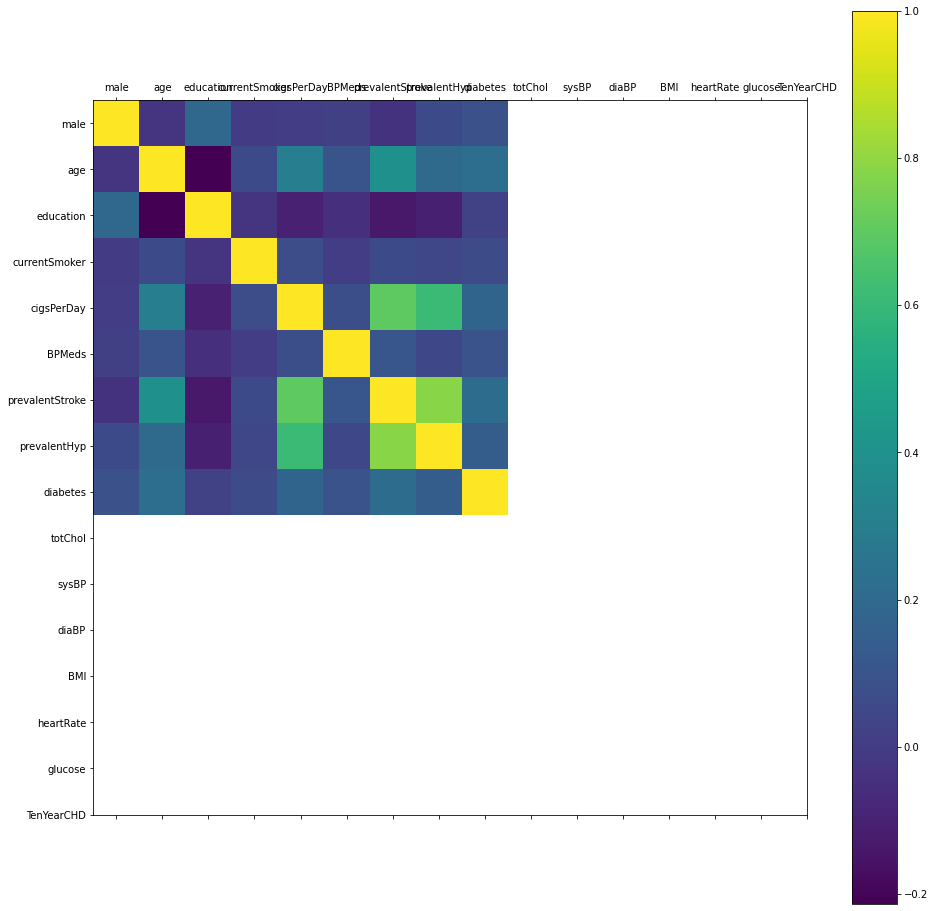

In [32]:
rcParams['figure.figsize'] = 14, 30
plt.matshow(heart_data.corr())
plt.yticks(np.arange(heart_data.shape[1]), heart_data.columns)
plt.xticks(np.arange(heart_data.shape[1]), heart_data.columns)

plt.colorbar()

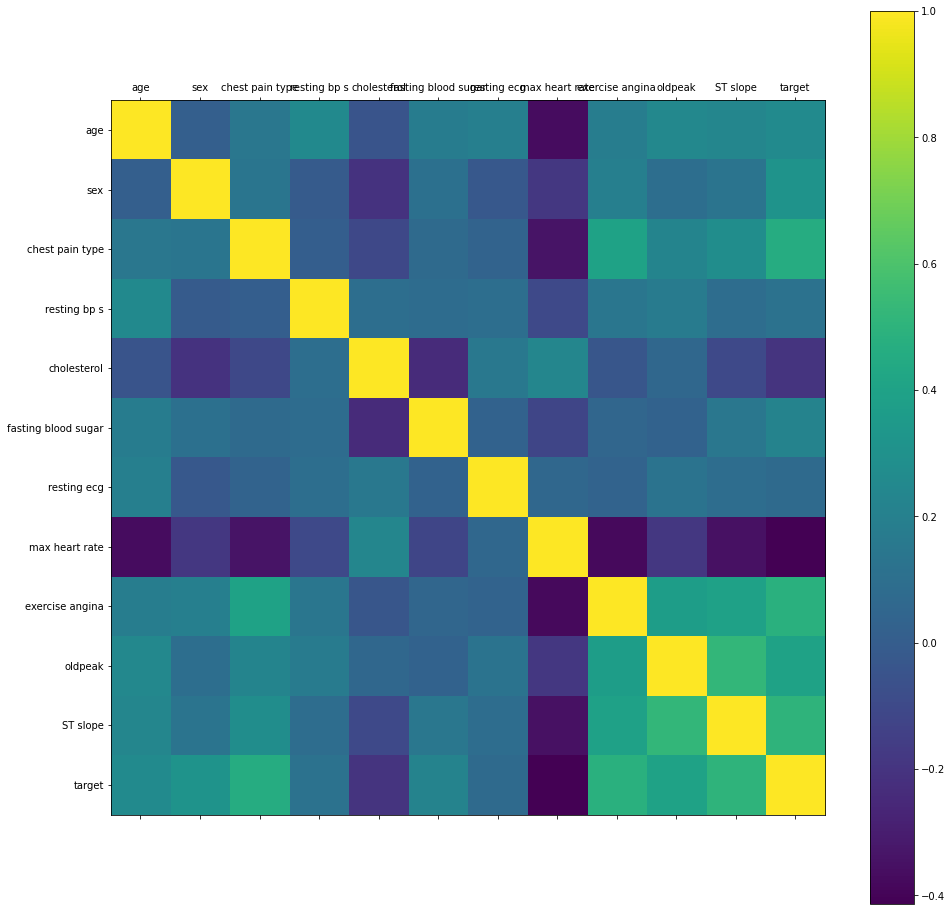

In [33]:
rcParams['figure.figsize'] = 18, 30
plt.matshow(heart_data_2.corr())
plt.yticks(np.arange(heart_data_2.shape[1]), heart_data_2.columns)
plt.xticks(np.arange(heart_data_2.shape[1]), heart_data_2.columns)
plt.colorbar()

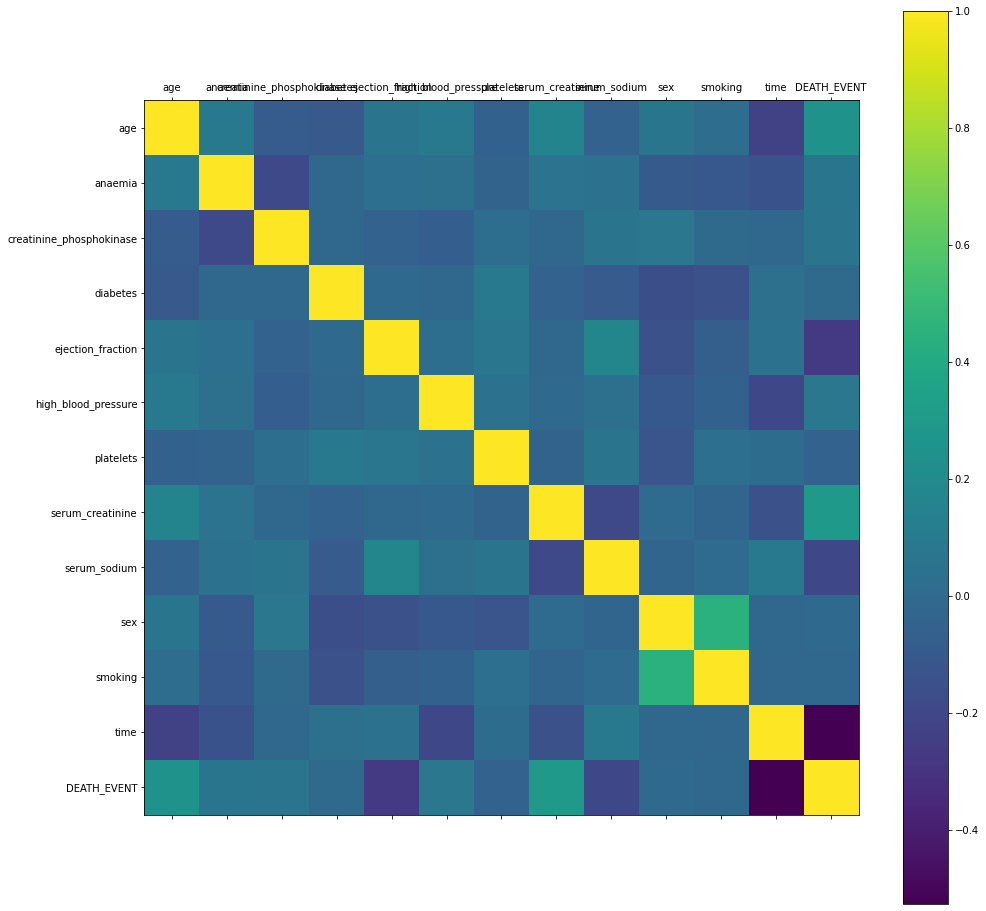

In [34]:
rcParams['figure.figsize'] = 25, 19
plt.matshow(heart_data_3.corr())
plt.yticks(np.arange(heart_data_3.shape[1]), heart_data_3.columns)
plt.xticks(np.arange(heart_data_3.shape[1]), heart_data_3.columns)
plt.colorbar()

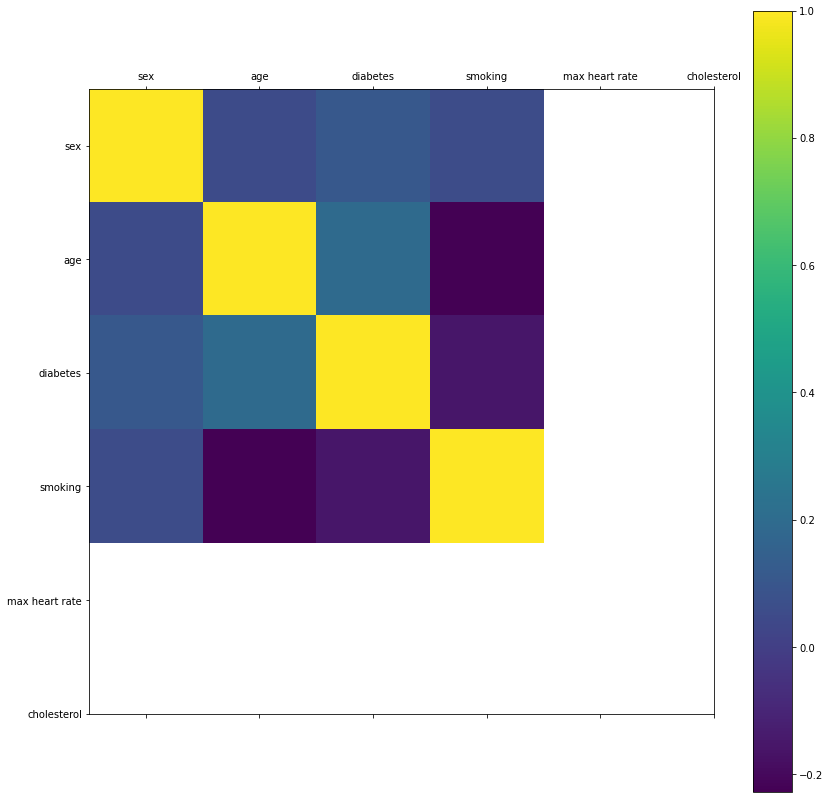

In [35]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(heart_data_4.corr())
plt.yticks(np.arange(heart_data_4.shape[1]), heart_data_4.columns)
plt.xticks(np.arange(heart_data_4.shape[1]), heart_data_4.columns)
plt.colorbar()

In [36]:
type(heart_data)

pandas.core.frame.DataFrame

In [37]:
heart_data.shape

(4240, 16)

In [38]:
heart_data_4.shape

(5729, 6)

In [39]:
type(heart_data_2)

pandas.core.frame.DataFrame

In [40]:
type(heart_data_3)

pandas.core.frame.DataFrame

In [41]:
heart_data_2.shape

(1190, 12)

In [42]:
heart_data_3.shape

(299, 13)

Text(0, 0.5, 'currentSmoker')

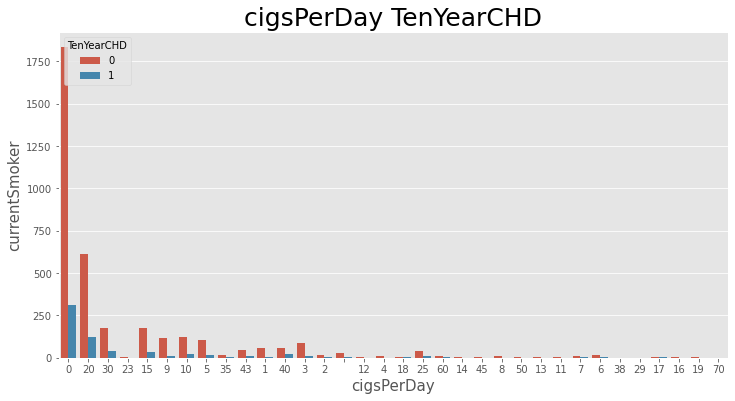

In [43]:
from matplotlib import style
style.use("ggplot")
plt.figure(figsize= (12,6))
sns.countplot('cigsPerDay', data=heart_data , hue= "TenYearCHD")
plt.title("cigsPerDay TenYearCHD",fontsize = 25)
plt.xlabel("cigsPerDay",fontsize = 15)
plt.ylabel("currentSmoker",fontsize = 15)

Text(0, 0.5, 'fasting blood sugar')

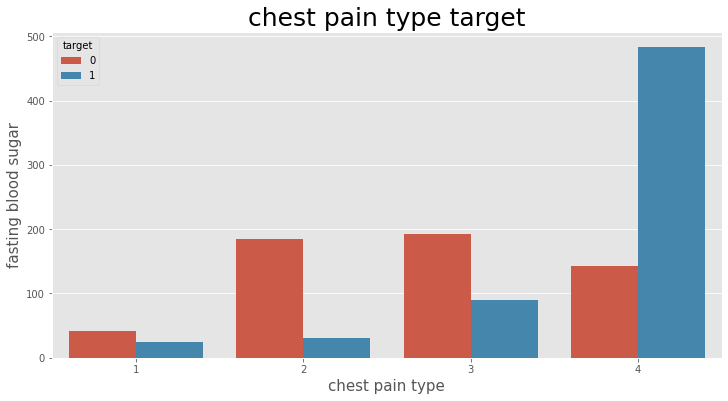

In [44]:
from matplotlib import style
style.use("ggplot")
plt.figure(figsize= (12,6))
sns.countplot('chest pain type', data=heart_data_2 , hue= "target")
plt.title("chest pain type target",fontsize = 25)
plt.xlabel("chest pain type",fontsize = 15)
plt.ylabel("fasting blood sugar",fontsize = 15)

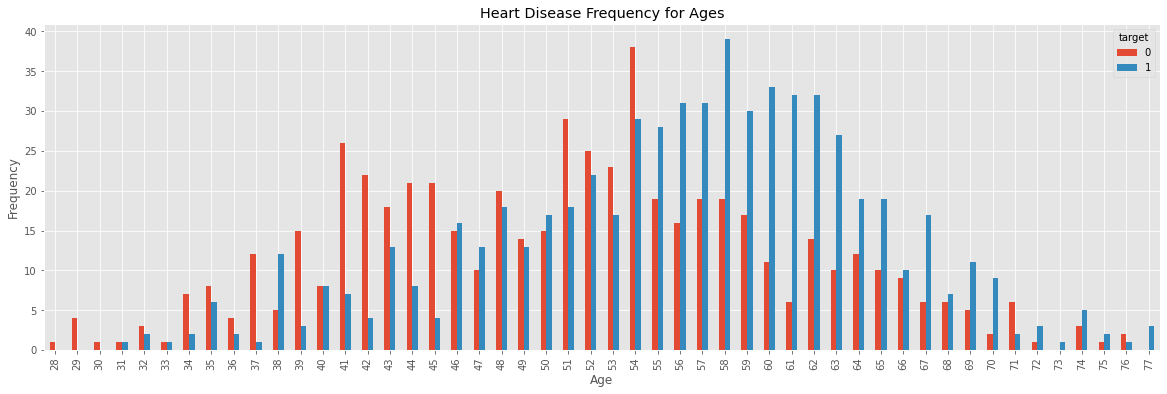

In [45]:
pd.crosstab(heart_data_2.age,heart_data_2.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

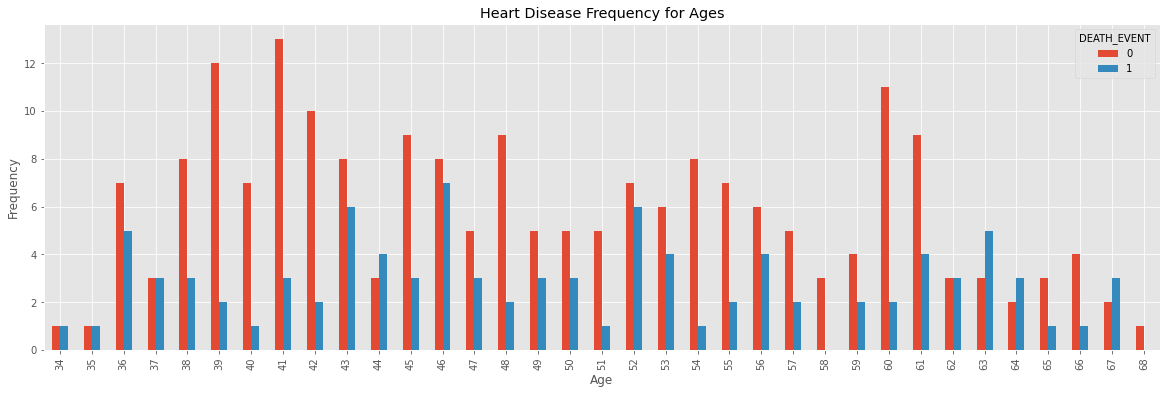

In [46]:
pd.crosstab(heart_data.age,heart_data_3.DEATH_EVENT).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

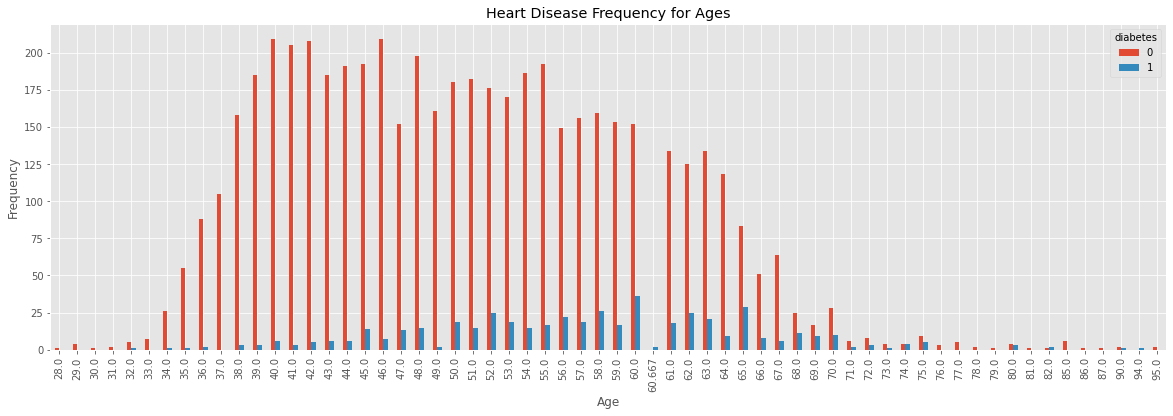

In [47]:
pd.crosstab(heart_data_4.age,heart_data_4.diabetes).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

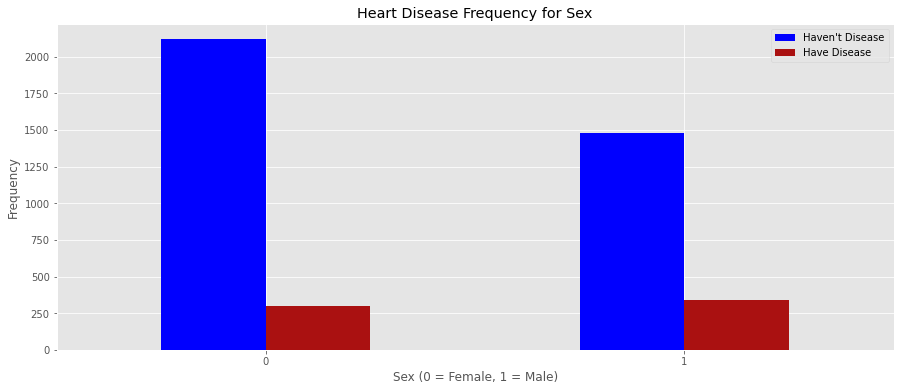

In [48]:
pd.crosstab(heart_data.male,heart_data.TenYearCHD).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

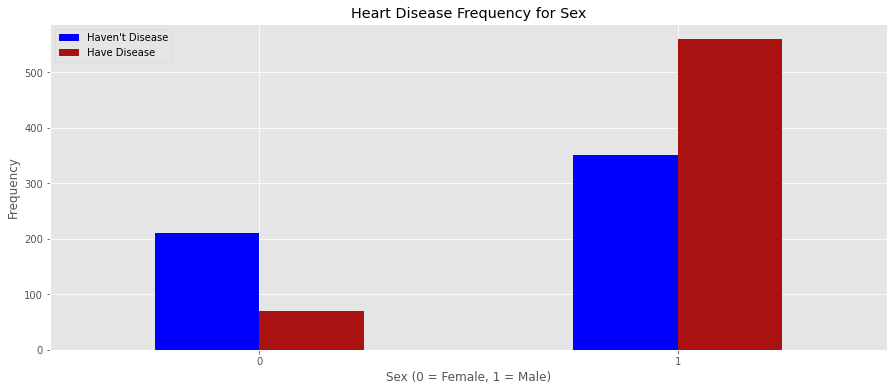

In [49]:
pd.crosstab(heart_data_2.sex,heart_data_2.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

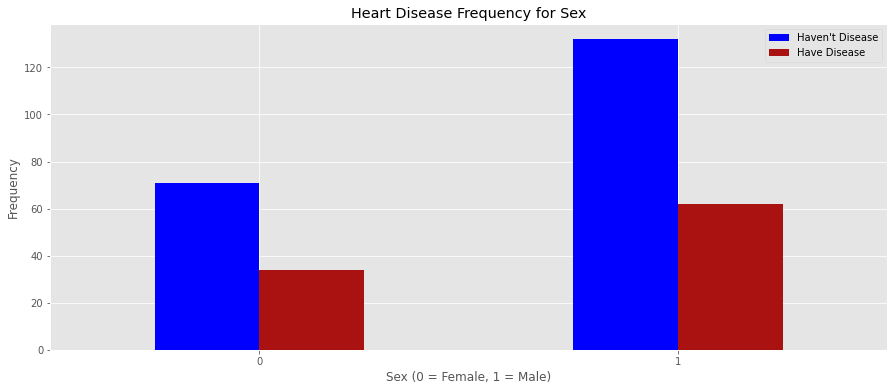

In [50]:
pd.crosstab(heart_data_3.sex,heart_data_3.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

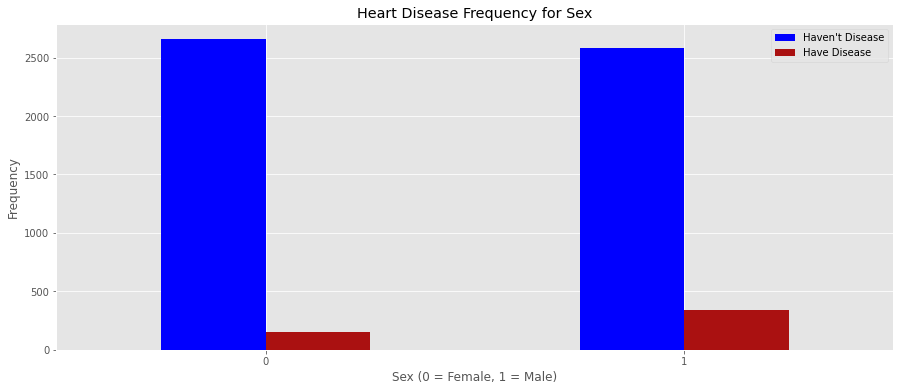

In [51]:
pd.crosstab(heart_data_4.sex,heart_data_4.diabetes).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

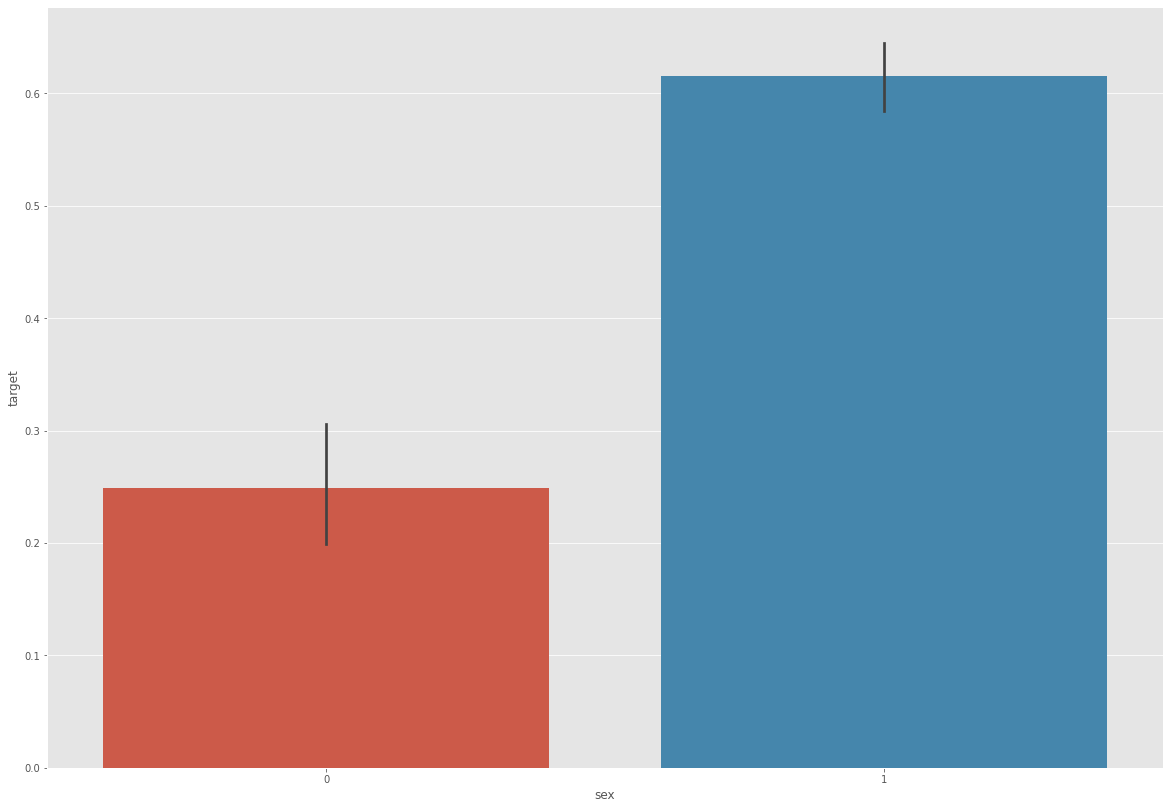

In [52]:
sns.barplot(heart_data_2["sex"],heart_data_2["target"])

Patient's Gender Male as 1 Female as 0

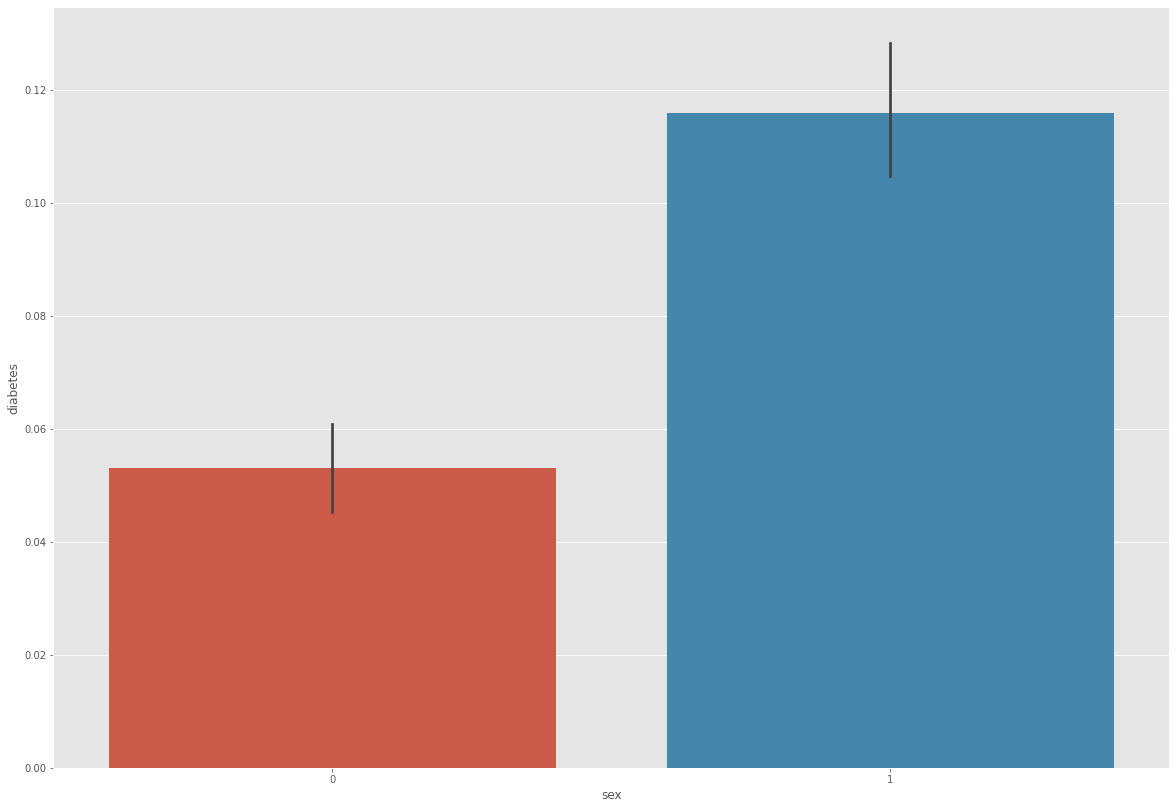

In [53]:
sns.barplot(heart_data_4["sex"],heart_data_4["diabetes"])

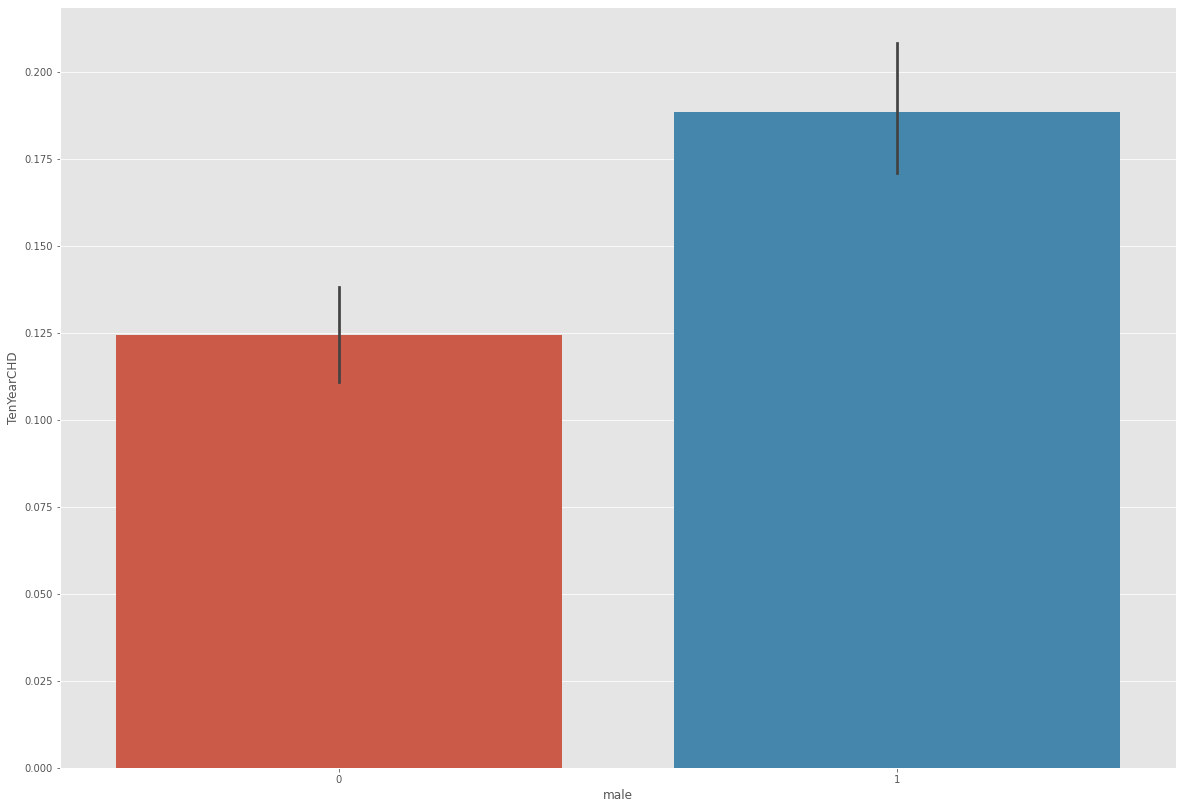

In [54]:
sns.barplot(heart_data["male"],heart_data["TenYearCHD"])

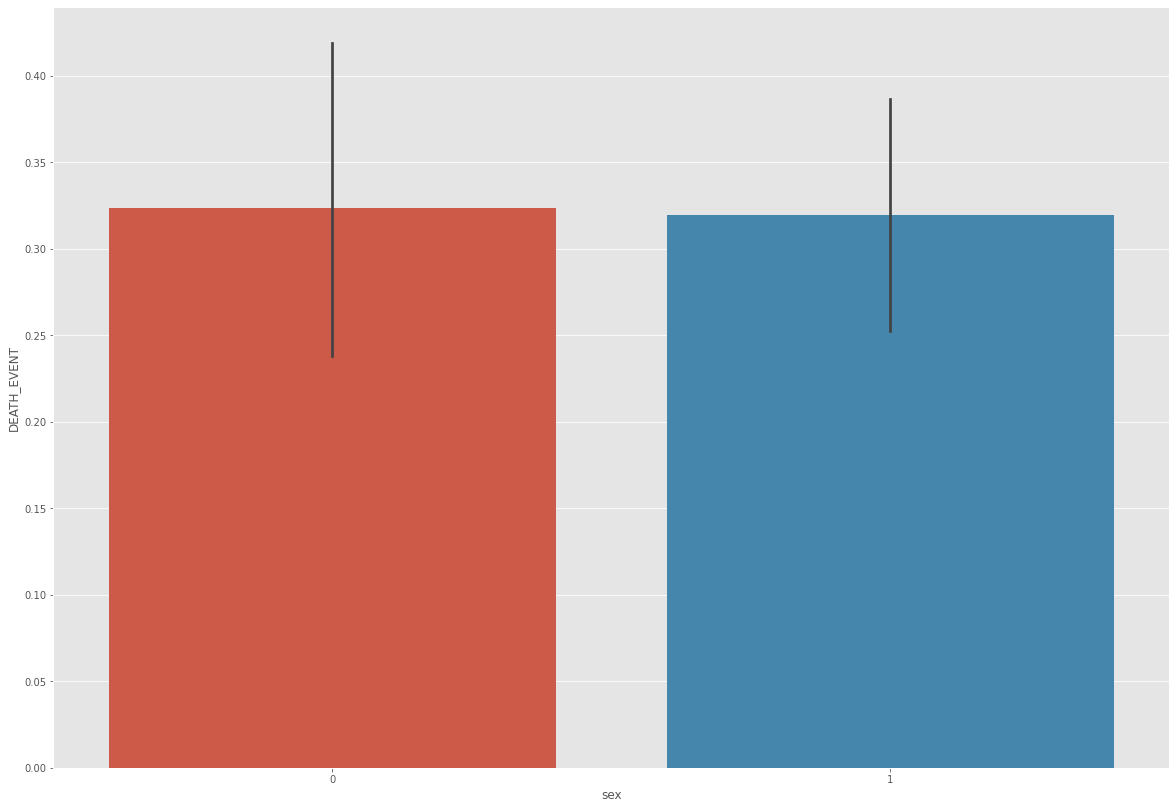

In [55]:
sns.barplot(heart_data_3["sex"],heart_data_3["DEATH_EVENT"])

In [56]:
#assigning levels to categories
list = []
for i in range(0,heart_data.shape[1]):
  if(heart_data.iloc[:,i].dtypes == 'object'):
    heart_data.iloc[:,i] = pd.Categorical(heart_data.iloc[:,i])
    heart_data.iloc[:,i] = heart_data.iloc[:,i].cat.codes
    heart_data.iloc[:,i] = heart_data.iloc[:,i].astype('object')
    list.append(heart_data.columns[i])

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

In [57]:
countFemale = len(heart_data[heart_data.male == 0])
countMale = len(heart_data[heart_data.male == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_data.male))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_data.male))*100))

Percentage of Female Patients:57.08%
Percentage of Male Patients:42.92%


In [58]:
countNoDisease = len(heart_data[heart_data.TenYearCHD == 0])
countHaveDisease = len(heart_data[heart_data.TenYearCHD == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_data.TenYearCHD))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_data.TenYearCHD))*100)))

Percentage of Patients Haven't Heart Disease: 84.81%
Percentage of Patients Have Heart Disease: 15.19%


In [59]:
#assigning levels to categories
list = []
for i in range(0,heart_data_2.shape[1]):
  if(heart_data_2.iloc[:,i].dtypes == 'object'):
    heart_data_2.iloc[:,i] = pd.Categorical(heart_data_2.iloc[:,i])
    heart_data_2.iloc[:,i] = heart_data_2.iloc[:,i].cat.codes
    heart_data_2.iloc[:,i] = heart_data_2.iloc[:,i].astype('object')
    list.append(heart_data_2.columns[i])

In [60]:
countFemale = len(heart_data_2[heart_data_2.sex == 0])
countMale = len(heart_data_2[heart_data_2.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_data_2.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_data_2.sex))*100))

Percentage of Female Patients:23.61%
Percentage of Male Patients:76.39%


In [61]:
countNoDisease = len(heart_data_2[heart_data_2.target == 0])
countHaveDisease = len(heart_data_2[heart_data_2.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_data_2.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_data_2.target))*100)))

Percentage of Patients Haven't Heart Disease: 47.14%
Percentage of Patients Have Heart Disease: 52.86%


In [62]:
#assigning levels to categories
list = []
for i in range(0,heart_data_3.shape[1]):
  if(heart_data_3.iloc[:,i].dtypes == 'object'):
    heart_data_3.iloc[:,i] = pd.Categorical(heart_data_3.iloc[:,i])
    heart_data_3.iloc[:,i] = heart_data_3.iloc[:,i].cat.codes
    heart_data_3.iloc[:,i] = heart_data_3.iloc[:,i].astype('object')
    list.append(heart_data_3.columns[i])

In [63]:
countFemale = len(heart_data_3[heart_data_3.sex == 0])
countMale = len(heart_data_3[heart_data_3.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_data_3.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_data_3.sex))*100))

Percentage of Female Patients:35.12%
Percentage of Male Patients:64.88%


In [64]:
countNoDisease = len(heart_data_3[heart_data_3.DEATH_EVENT == 0])
countHaveDisease = len(heart_data_3[heart_data_3.DEATH_EVENT == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_data_3.DEATH_EVENT))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_data_3.DEATH_EVENT))*100)))

Percentage of Patients Haven't Heart Disease: 67.89%
Percentage of Patients Have Heart Disease: 32.11%


In [65]:
#assigning levels to categories
list = []
for i in range(0,heart_data_4.shape[1]):
  if(heart_data_4.iloc[:,i].dtypes == 'object'):
    heart_data_4.iloc[:,i] = pd.Categorical(heart_data_4.iloc[:,i])
    heart_data_4.iloc[:,i] = heart_data_4.iloc[:,i].cat.codes
    heart_data_4.iloc[:,i] = heart_data_4.iloc[:,i].astype('object')
    list.append(heart_data_4.columns[i])

In [66]:
countFemale = len(heart_data_4[heart_data_4.sex == 0])
countMale = len(heart_data_4[heart_data_4.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_data_4.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_data_4.sex))*100))

Percentage of Female Patients:48.98%
Percentage of Male Patients:51.02%


In [67]:
countNoDisease = len(heart_data_3[heart_data_4.diabetes == 0])
countHaveDisease = len(heart_data_3[heart_data_4.diabetes == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_data_4.diabetes))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_data_4.diabetes))*100)))

Percentage of Patients Haven't Heart Disease: 3.04%
Percentage of Patients Have Heart Disease: 2.18%


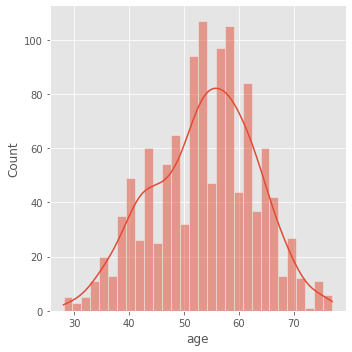

In [68]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = heart_data_2, bins = 30, kde = True);

52-53 year old people are most in the heart_data_2

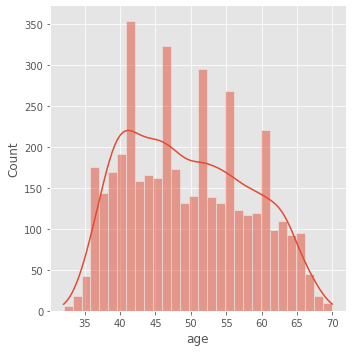

In [69]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = heart_data, bins = 30, kde = True);

41-42 year old people are most in the heart_data

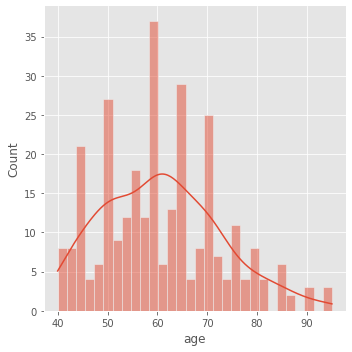

In [70]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = heart_data_3, bins = 30, kde = True);

59-60 year old people are most in the heart_data_3

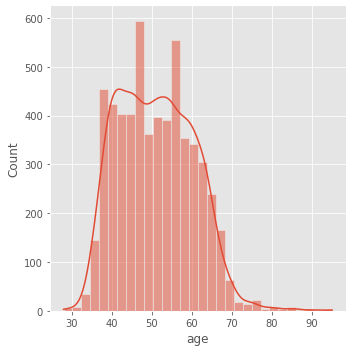

In [71]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = heart_data_4, bins = 30, kde = True);

48-49 year old people are most in the heart_data_4
As this data is the combination data of those three datasets so it is clear that Maximum Person at the age of 48-49 face heart diseases.

Let's make a density curve for visualizing the distribution of age and chol observations in our dataset.

Train Test Split

In [88]:
predictors = heart_data_2.drop("target",axis=1)
target = heart_data_2["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [89]:
X_train.shape

(952, 11)

In [90]:
X_test.shape

(238, 11)

In [91]:
Y_train.shape

(952,)

In [92]:
Y_test.shape

(238,)

In [93]:
#Model Fitting
from sklearn.metrics import accuracy_score

Logistic Regression for Heart_data_2

In [94]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [95]:
Y_pred_lr.shape

(238,)

In [96]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %


Naive Bayes for  Heart_data_2

In [97]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [98]:
Y_pred_nb.shape

(238,)

In [99]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.29 %


SVM Heart_data_2

In [100]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [101]:
Y_pred_svm.shape

(238,)

In [102]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.25 %


Confusion matrix

In [104]:
logR = LogisticRegression()

In [105]:
logR.fit(X_train,Y_train)

LogisticRegression()

In [106]:
scoreR= logR.score(X_test,Y_test)
scoreR

0.8067226890756303

In [107]:
pre = logR.predict(X_test)
pre

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,Y_test)

0.8067226890756303

In [109]:
confusion_matrix (pre,Y_test)

array([[ 85,  22],
       [ 24, 107]])

In [110]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       107
           1       0.83      0.82      0.82       131

    accuracy                           0.81       238
   macro avg       0.80      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238



Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

In [112]:
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [113]:
print(Y_pred_dt.shape)

(238,)


In [114]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 88.24 %


Confusion Matrix

In [115]:
Dclf = DecisionTreeClassifier()

In [116]:
Dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [117]:
scoreR= Dclf.score(X_test,Y_test)
scoreR

0.8697478991596639

In [119]:
pre = Dclf.predict(X_test)
pre

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,Y_test)

0.8697478991596639

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix (pre,Y_test)

array([[ 96,  18],
       [ 13, 111]])

In [122]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       114
           1       0.86      0.90      0.88       124

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

In [124]:
for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [125]:
Y_pred_rf.shape

(238,)

In [126]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forrest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forrest is: 94.96 %


Confusion Matrix & Perfomence

In [127]:
Rclf = RandomForestClassifier()

In [128]:
Rclf.fit(X_train,Y_train)

RandomForestClassifier()

In [129]:
scoreR= Rclf.score(X_test,Y_test)
scoreR

0.9327731092436975

In [130]:
pre = Rclf.predict(X_test)
pre

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,Y_test)

0.9327731092436975

In [133]:
confusion_matrix (pre,Y_test)

array([[100,   7],
       [  9, 122]])

In [134]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       107
           1       0.95      0.93      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [136]:
scores = [score_lr,score_nb,score_svm,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %
The accuracy score achieved using Naive Bayes is: 85.29 %
The accuracy score achieved using Support Vector Machine is: 80.25 %
The accuracy score achieved using Decision Tree is: 88.24 %
The accuracy score achieved using Random Forest is: 94.96 %


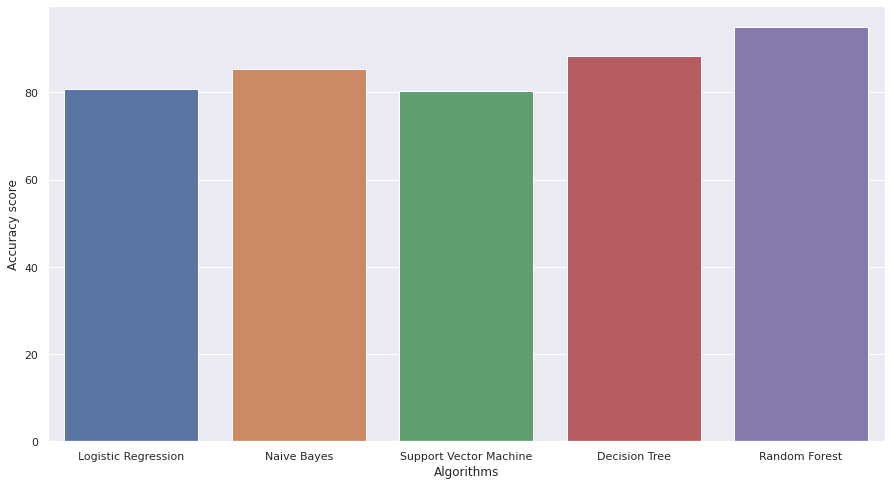

In [137]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [138]:
#Model Fitting
from sklearn.metrics import accuracy_score

In [139]:
predictors = heart_data_4.drop("diabetes",axis=1)
target = heart_data_4["diabetes"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [140]:
X_train.shape

(4583, 5)

In [141]:
X_test.shape

(1146, 5)

In [142]:
Y_train.shape

(4583,)

In [143]:
Y_test.shape

(1146,)

logistic Regression Of Heart_Data_4

In [144]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [145]:
Y_pred_lr.shape

(1146,)

In [146]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.8 %


In [147]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [148]:
Y_pred_nb.shape

(1146,)

In [149]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 90.05 %


Confusion Matrix

In [150]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [151]:
scoreR= lr.score(X_test,Y_test)
scoreR

0.9179755671902269

In [153]:
pre = lr.predict(X_test)
pre

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,Y_test)

0.9179755671902269

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix (pre,Y_test)

array([[1045,   82],
       [  12,    7]])

In [156]:
from sklearn.metrics import classification_report
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1127
           1       0.08      0.37      0.13        19

    accuracy                           0.92      1146
   macro avg       0.53      0.65      0.54      1146
weighted avg       0.97      0.92      0.94      1146



SVM (Support Vector Machine)

In [161]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [162]:
Y_pred_svm.shape

(1146,)

In [163]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 92.23 %


Confusion Matrix

In [166]:

scoreS = sv.score(X_test,Y_test)
scoreS

0.9223385689354275

In [167]:
pre = sv.predict(X_test)
pre

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
accuracy_score(pre,Y_test)

0.9223385689354275

In [169]:
confusion_matrix (pre,Y_test)

array([[1057,   89],
       [   0,    0]])

In [170]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1146
           1       0.00      0.00      0.00         0

    accuracy                           0.92      1146
   macro avg       0.50      0.46      0.48      1146
weighted avg       1.00      0.92      0.96      1146



In [174]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [175]:
print(Y_pred_dt.shape)

(1146,)


In [176]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 90.4 %


Confusion Matrix

In [177]:
Dclf = DecisionTreeClassifier()
Dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [178]:
scoreD = Dclf.score(X_test,Y_test)
scoreD

0.8961605584642234

In [179]:
pre = Dclf.predict(X_test)
pre

array([0, 0, 1, ..., 0, 0, 1])

In [180]:
accuracy_score(pre,Y_test)

0.8961605584642234

In [181]:
confusion_matrix (pre,Y_test)

array([[988,  50],
       [ 69,  39]])

In [182]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1038
           1       0.44      0.36      0.40       108

    accuracy                           0.90      1146
   macro avg       0.69      0.66      0.67      1146
weighted avg       0.89      0.90      0.89      1146



In [186]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [187]:
Y_pred_rf.shape

(1146,)

In [188]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 92.76 %


Confusion Matrix

In [190]:
Rclf = RandomForestClassifier()
Rclf.fit(X_train,Y_train)

RandomForestClassifier()

In [191]:
scoreR= Rclf.score(X_test,Y_test)
scoreR

0.9223385689354275

In [192]:
pre = Rclf.predict(X_test)
pre

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,Y_test)

0.9223385689354275

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix (pre,Y_test)

array([[1025,   57],
       [  32,   32]])

In [195]:
from sklearn.metrics import classification_report
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1082
           1       0.36      0.50      0.42        64

    accuracy                           0.92      1146
   macro avg       0.66      0.72      0.69      1146
weighted avg       0.94      0.92      0.93      1146



In [196]:
scores = [score_lr,score_nb,score_svm,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 91.8 %
The accuracy score achieved using Naive Bayes is: 90.05 %
The accuracy score achieved using Support Vector Machine is: 92.23 %
The accuracy score achieved using Decision Tree is: 90.4 %
The accuracy score achieved using Random Forest is: 92.76 %


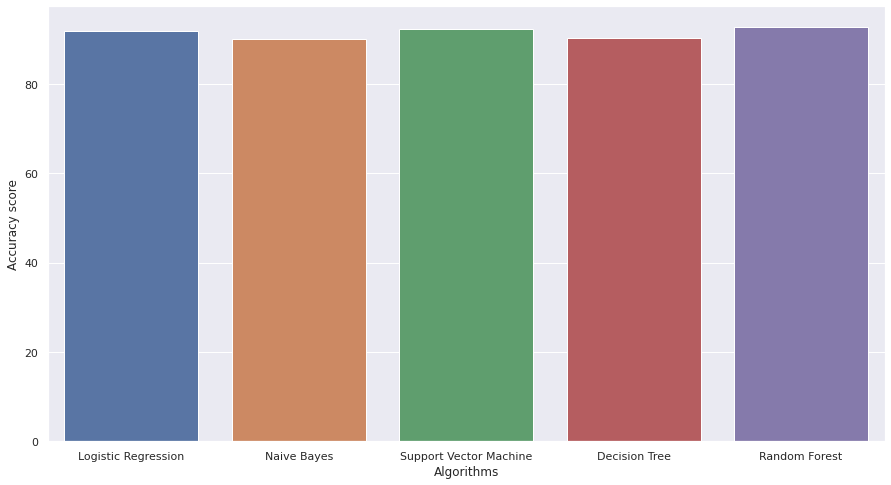

In [197]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [198]:
predictors = heart_data_3.drop("DEATH_EVENT",axis=1)
target = heart_data_3["DEATH_EVENT"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [199]:
X_train.shape


(239, 12)

In [200]:
X_test.shape


(60, 12)

In [201]:
Y_train.shape


(239,)

In [202]:
Y_test.shape

(60,)

LogisticRegression

In [206]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [207]:
Y_pred_lr.shape

(60,)

In [208]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 73.33 %


confusion matrix

In [209]:
lr = LogisticRegression()

In [210]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [211]:
scoreL= lr.score(X_test,Y_test)
scoreL

0.7333333333333333

In [213]:
pre = lr.predict(X_test)
pre

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,Y_test)

0.7333333333333333

In [215]:
from sklearn.metrics import confusion_matrix
confusion_matrix (pre,Y_test)

array([[35, 14],
       [ 2,  9]])

In [216]:
from sklearn.metrics import classification_report
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81        49
           1       0.39      0.82      0.53        11

    accuracy                           0.73        60
   macro avg       0.67      0.77      0.67        60
weighted avg       0.84      0.73      0.76        60



NAive Bayes

In [221]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [222]:
Y_pred_nb.shape

(60,)

In [223]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 76.67 %


Confusion Matrix

In [225]:
scoreN = nb.score(X_test,Y_test)
scoreN

0.7666666666666667

In [226]:
pre = nb.predict(X_test)
pre

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [227]:
accuracy_score(pre,Y_test)

0.7666666666666667

In [228]:
confusion_matrix (pre,Y_test)

array([[36, 13],
       [ 1, 10]])

In [229]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84        49
           1       0.43      0.91      0.59        11

    accuracy                           0.77        60
   macro avg       0.70      0.82      0.71        60
weighted avg       0.87      0.77      0.79        60



In [230]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [231]:
Y_pred_svm.shape

(60,)

In [232]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.67 %


confusion matrix

In [233]:
scoreV = sv.score(X_test,Y_test)
scoreV

0.7666666666666667

In [234]:
pre = sv.predict(X_test)
pre

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [235]:
accuracy_score(pre,Y_test)

0.7666666666666667

In [236]:
confusion_matrix (pre,Y_test)

array([[36, 13],
       [ 1, 10]])

In [237]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84        49
           1       0.43      0.91      0.59        11

    accuracy                           0.77        60
   macro avg       0.70      0.82      0.71        60
weighted avg       0.87      0.77      0.79        60



In [238]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [239]:
print(Y_pred_dt.shape)

(60,)


In [240]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 80.0 %


confusion matrix

In [241]:
pre = dt.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [242]:
accuracy_score(pre,Y_test)

0.8

In [243]:
confusion_matrix (pre,Y_test)

array([[33,  8],
       [ 4, 15]])

In [244]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.65      0.79      0.71        19

    accuracy                           0.80        60
   macro avg       0.77      0.80      0.78        60
weighted avg       0.82      0.80      0.80        60



In [245]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [246]:
Y_pred_rf.shape

(60,)

In [247]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forrest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forrest is: 90.0 %


In [248]:
pre = rf.predict(X_test)
pre

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [249]:
accuracy_score(pre,Y_test)

0.9

In [250]:
confusion_matrix (pre,Y_test)

array([[36,  5],
       [ 1, 18]])

In [251]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        41
           1       0.78      0.95      0.86        19

    accuracy                           0.90        60
   macro avg       0.88      0.91      0.89        60
weighted avg       0.91      0.90      0.90        60



In [252]:
scores = [score_lr,score_nb,score_svm,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 73.33 %
The accuracy score achieved using Naive Bayes is: 76.67 %
The accuracy score achieved using Support Vector Machine is: 76.67 %
The accuracy score achieved using Decision Tree is: 80.0 %
The accuracy score achieved using Random Forest is: 90.0 %


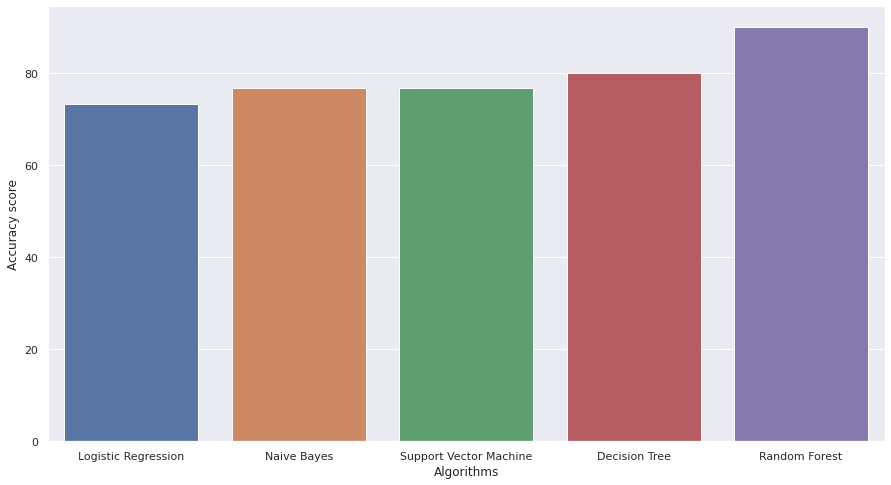

In [253]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [254]:
predictors = heart_data.drop("TenYearCHD",axis=1)
target = heart_data["TenYearCHD"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [255]:
X_train.shape

(3392, 15)

In [256]:
X_test.shape

(848, 15)

In [ ]:
Y_train.shape

In [258]:
Y_test.shape

(848,)

In [259]:
#Model Fitting
from sklearn.metrics import accuracy_score

In [260]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [261]:
Y_pred_lr.shape

(848,)

In [262]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.79 %


In [263]:
pre = lr.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [264]:
accuracy_score(pre,Y_test)

0.847877358490566

In [265]:
confusion_matrix (pre,Y_test)

array([[716, 123],
       [  6,   3]])

In [266]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       839
           1       0.02      0.33      0.04         9

    accuracy                           0.85       848
   macro avg       0.51      0.59      0.48       848
weighted avg       0.98      0.85      0.91       848



In [267]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [268]:
Y_pred_nb.shape

(848,)

In [269]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.96 %


In [270]:
pre = nb.predict(X_test)
pre

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [271]:
accuracy_score(pre,Y_test)

0.8195754716981132

In [272]:
confusion_matrix (pre,Y_test)

array([[666,  97],
       [ 56,  29]])

In [273]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       763
           1       0.23      0.34      0.27        85

    accuracy                           0.82       848
   macro avg       0.58      0.61      0.59       848
weighted avg       0.85      0.82      0.83       848



In [274]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [275]:
Y_pred_svm.shape

(848,)

In [276]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 85.14 %


In [284]:
pre = sv.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [285]:
accuracy_score(pre,Y_test)

0.8514150943396226

In [286]:
confusion_matrix (pre,Y_test)

array([[722, 126],
       [  0,   0]])

In [287]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       848
           1       0.00      0.00      0.00         0

    accuracy                           0.85       848
   macro avg       0.50      0.43      0.46       848
weighted avg       1.00      0.85      0.92       848



In [288]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [289]:
print(Y_pred_dt.shape)

(848,)


In [290]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.59 %


In [291]:
pre = dt.predict(X_test)
pre

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [292]:
accuracy_score(pre,Y_test)

0.7759433962264151

In [293]:
confusion_matrix (pre,Y_test)

array([[631,  99],
       [ 91,  27]])

In [294]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       730
           1       0.21      0.23      0.22       118

    accuracy                           0.78       848
   macro avg       0.54      0.55      0.55       848
weighted avg       0.78      0.78      0.78       848



In [295]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [296]:
Y_pred_rf.shape

(848,)

In [297]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.2 %


In [298]:
pre = rf.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [299]:
accuracy_score(pre,Y_test)

0.8620283018867925

In [300]:
confusion_matrix (pre,Y_test)

array([[722, 117],
       [  0,   9]])

In [301]:
print(classification_report(pre,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       839
           1       0.07      1.00      0.13         9

    accuracy                           0.86       848
   macro avg       0.54      0.93      0.53       848
weighted avg       0.99      0.86      0.92       848



In [302]:
scores = [score_lr,score_nb,score_svm,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 84.79 %
The accuracy score achieved using Naive Bayes is: 81.96 %
The accuracy score achieved using Support Vector Machine is: 85.14 %
The accuracy score achieved using Decision Tree is: 77.59 %
The accuracy score achieved using Random Forest is: 86.2 %


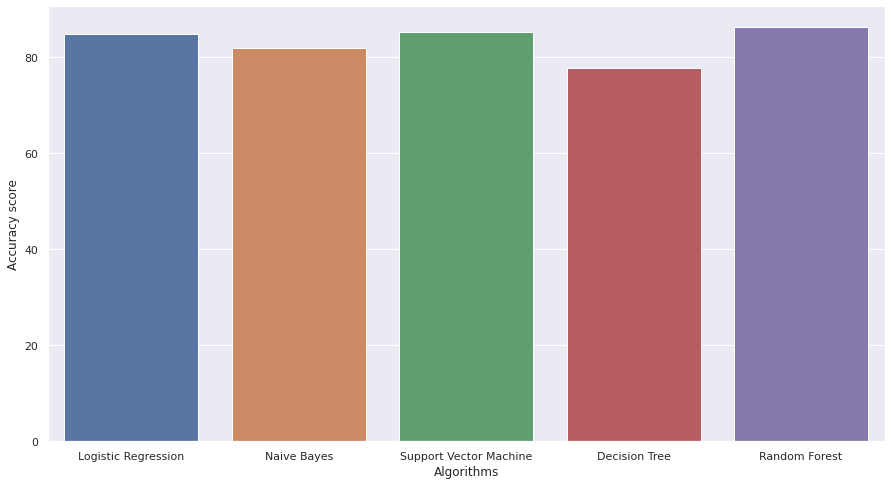

In [303]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)